<a href="https://colab.research.google.com/github/kevinliu121/BW1/blob/master/HSData_Sprint_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [0]:
!wget https://raw.githubusercontent.com/kevinliu121/BW1/master/HSDat.csv

--2019-11-22 18:18:44--  https://raw.githubusercontent.com/kevinliu121/BW1/master/HSDat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3267 (3.2K) [text/plain]
Saving to: ‘HSDat.csv’

HSDat.csv           100%[===================>]   3.19K  --.-KB/s    in 0s      

2019-11-22 18:18:44 (69.4 MB/s) - ‘HSDat.csv’ saved [3267/3267]



# **Hypothesis**

**My hypothesis is that my deck overall will have a positive winrate past turn 10, as well as have a positive winrate against aggro decks, but a lower winrate against deathrattle decks. I also hypothesize that I will lose out to Druids the most, because in general they are the dominant class, and finally my winrate with the ideal starting hand will win more in the late game than in the earlier game**

# **LEGEND**

starting_hand : How many of the ideal cards I received in my starting hand.

---

good_start: If I recieved all my ideal cards reads Y, if not reads N


---
mulliganed: Reads out 1 or 0, for if I had mulliganed my hand


---
W/L: Dictates wether or not I had won or lost the game

---

Turns: Dictates reads how many turns had passed

---

Opponents class: 0 = Druid, 1 = Hunter, 2 = Mage, 3 = Paladin, 4 = Priest, 5 = Rogue, 6 = Shaman, 7 = Warlock, 8 = Warrior


---

Opponents Archetype: 0 = Aggro, 1 = Control, 2 = Midrange, 3 = Token/Lackey, 4 = Combo/OTK, 5 = Zoo, 6 = Tempo, 7 = Ramp, 8 = Even, 9 = Odd, 10 = Mech, 11 = Deathrattle, 12 = Quest






In [0]:
hsdat = pd.read_csv('HSDat.csv')
hsdat

,starting_hand,good_start,mulliganed,W/L,Turns,opponent_class,opponent_deck_archetype
0,1,N,1,0,16,3,4
1,0,N,1,1,15,5,0
2,3,Y,0,0,13,0,7
3,1,N,1,0,9,2,12
4,2,N,1,1,8,8,1
...,...,...,...,...,...,...,...
194,2,N,1,1,15,7,1
195,0,N,1,1,15,2,1
196,3,Y,1,1,11,5,3
197,3,Y,0,1,12,4,12


# Win Percentage
The most basic and important thing I want to know is how well my deck did overall. A technical deck that is only good against certain decks is only truly
viable in a constructed tournament format, however this is for casual gameplay so truly overall winrate is the most important thing. 

In [0]:
### Overall Percentage of Wins vs Losses
hsdat['W/L'].value_counts(normalize=True) * 100

1    53.768844
0    46.231156
Name: W/L, dtype: float64

## The biggest question is winrate with my main ideal starting hand.

This is something I want to keep track of because I want to know if I am mulliganing properly or if I should change my ideal starting hand.

My ideal starting hand includes:

![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/7/76/Naga_Sand_Witch%2890820%29.png/200px-Naga_Sand_Witch%2890820%29.png?version=ca9cfb5b015516e583ffe5bbe2459791)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/a/af/Puzzle_Box_of_Yogg-Saron%2890692%29.png/200px-Puzzle_Box_of_Yogg-Saron%2890692%29.png?version=a3609058a4d5870bd3dd004101c8410a)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/5/5e/Luna%27s_Pocket_Galaxy%2889888%29.png/200px-Luna%27s_Pocket_Galaxy%2889888%29.png?version=e58077606e35980b1d7d9d491d9f25a4)

In [0]:
good_hand = hsdat[hsdat.good_start == 'Y']
good_hand['W/L'].value_counts(normalize=True) * 100

1    58.823529
0    41.176471
Name: W/L, dtype: float64

In [0]:
bad_hand = hsdat[hsdat.good_start == 'N']
bad_hand['W/L'].value_counts(normalize=True) * 100

1    52.727273
0    47.272727
Name: W/L, dtype: float64

**A key thing that I've figured out is that my deck worked well in my tests. I've had positive winrates overall against each class, but I am curious if there is a specific kind of ARCHETYPE I lose again**

In [0]:
pd.value_counts(hsdat['opponent_deck_archetype'].values, sort=False)

0     45
1     39
2      4
3      8
4     12
5      4
6     11
7     13
8      2
10    10
11    12
12    39
dtype: int64

# General Winrates

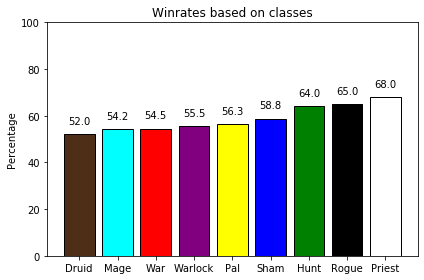

In [0]:
labels = ['Druid', 'Mage', 'War', 'Warlock', 'Pal', 'Sham', 'Hunt',
          'Rogue', 'Priest']
good_means = [52, 54.2, 54.5, 55.5, 56.3, 58.8, 64, 65, 68]


x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x , good_means, width, label='Classes')



ax.set_ylabel('Percentage')
ax.set_title('Winrates based on classes')
plt.bar(x, good_means, color=['#4f2e17', 'cyan', 'red', 'purple', 'yellow',
                             'blue', 'green', 'black', 'white'], edgecolor =
        'black')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0,100])


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 8),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)


fig.tight_layout()

plt.show()

## General Druid Winrate - 52% - Worst Matchup
According to my general winrate this class is what I struggled against the most. I wonder if there is specific cards that are being played that are countering my deck.

In [0]:
druid = hsdat[hsdat.opponent_class == 0]
druid['W/L'].value_counts(normalize=True) * 100



1    52.173913
0    47.826087
Name: W/L, dtype: float64

## General Hunter Winrate - 64%

In [0]:
hunter = hsdat[hsdat.opponent_class == 1]
hunter['W/L'].value_counts(normalize=True) * 100

1    64.285714
0    35.714286
Name: W/L, dtype: float64

## General Mage Winrate - 54.2%

In [0]:
mage = hsdat[hsdat.opponent_class == 2]
mage['W/L'].value_counts(normalize=True) * 100

1    54.166667
0    45.833333
Name: W/L, dtype: float64

## General Paladin Winrate - 56.3% 

In [0]:
paladin = hsdat[hsdat.opponent_class == 3]
paladin['W/L'].value_counts(normalize=True) * 100

0    56.25
1    43.75
Name: W/L, dtype: float64

## General Priest Winrate - 68% - BEST GENERAL MATCHUP

In [0]:
priest = hsdat[hsdat.opponent_class == 4]
priest['W/L'].value_counts(normalize=True) * 100

1    68.181818
0    31.818182
Name: W/L, dtype: float64

## General Rogue Winrate - 65% 

In [0]:
rogue = hsdat[hsdat.opponent_class == 5]
rogue['W/L'].value_counts(normalize=True) * 100

1    65.0
0    35.0
Name: W/L, dtype: float64

## General Shaman Winrate - 58.8%

In [0]:
shaman = hsdat[hsdat.opponent_class == 6]
shaman['W/L'].value_counts(normalize=True) * 100

0    58.823529
1    41.176471
Name: W/L, dtype: float64

## General Warlock Winrate - 55.5%

In [0]:
warlock = hsdat[hsdat.opponent_class == 7]
warlock['W/L'].value_counts(normalize=True) * 100

0    55.555556
1    44.444444
Name: W/L, dtype: float64

## General Warrior Winrate - 54.5%

In [0]:
warrior= hsdat[hsdat.opponent_class == 8]
warrior['W/L'].value_counts(normalize=True) * 100

0    54.545455
1    45.454545
Name: W/L, dtype: float64

# META/Archetypes and it's importance.

## A supposed META - What is it, and Why is it important?
A clear thing that I realized after going through my data is that I can somewhat see the Meta of the current edition of the game. Meta in gaming should be written as META, as it is an acronym. META stands for "Most Effective Tactics Available." In terms for Hearthstone, it's usually what is the most effective deck availiable for a class.


---

If we look at the distribution of all the classes we can find what is the most frequently played deck for each class, and furthermore infer why these decks are being played.



In [0]:
aggro = hsdat[hsdat.opponent_deck_archetype == 0]
aggro['W/L'].value_counts(normalize=True) * 100

1    62.222222
0    37.777778
Name: W/L, dtype: float64

In [0]:
control = hsdat[hsdat.opponent_deck_archetype == 1]
control['W/L'].value_counts(normalize=True) * 100

1    56.410256
0    43.589744
Name: W/L, dtype: float64

In [0]:
midrange = hsdat[hsdat.opponent_deck_archetype == 2]
midrange['W/L'].value_counts(normalize=True) * 100

1    50.0
0    50.0
Name: W/L, dtype: float64

In [0]:
token = hsdat[hsdat.opponent_deck_archetype == 3]
token['W/L'].value_counts(normalize=True) * 100

1    50.0
0    50.0
Name: W/L, dtype: float64

In [0]:
combo = hsdat[hsdat.opponent_deck_archetype == 4]
combo['W/L'].value_counts(normalize=True) * 100

0    58.333333
1    41.666667
Name: W/L, dtype: float64

In [0]:
Zoo = hsdat[hsdat.opponent_deck_archetype == 5]
Zoo['W/L'].value_counts(normalize=True) * 100

1    75.0
0    25.0
Name: W/L, dtype: float64

In [0]:
tempo = hsdat[hsdat.opponent_deck_archetype == 6]
tempo['W/L'].value_counts(normalize=True) * 100

0    63.636364
1    36.363636
Name: W/L, dtype: float64

In [0]:
ramp = hsdat[hsdat.opponent_deck_archetype == 9]
ramp['W/L'].value_counts(normalize=True) * 100

Series([], Name: W/L, dtype: float64)

In [0]:
even = hsdat[hsdat.opponent_deck_archetype == 8]
even['W/L'].value_counts(normalize=True) * 100

1    100.0
Name: W/L, dtype: float64

In [0]:
mech = hsdat[hsdat.opponent_deck_archetype == 10]
mech['W/L'].value_counts(normalize=True) * 100

0    60.0
1    40.0
Name: W/L, dtype: float64

In [0]:
deathrattle = hsdat[hsdat.opponent_deck_archetype == 11]
deathrattle['W/L'].value_counts(normalize=True) * 100

0    58.333333
1    41.666667
Name: W/L, dtype: float64

In [0]:
quest = hsdat[hsdat.opponent_deck_archetype == 12]
quest['W/L'].value_counts(normalize=True) * 100

1    53.846154
0    46.153846
Name: W/L, dtype: float64

# graph for achetypes

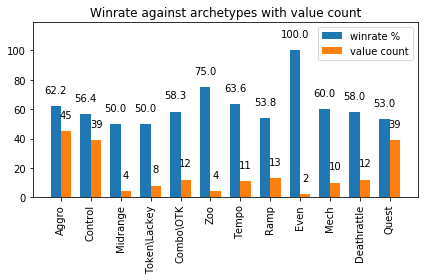

In [0]:
labels = ['Aggro', 'Control', 'Midrange', 'Token\Lackey', 'Combo\OTK','Zoo', 
          'Tempo', 'Ramp', 'Even', 'Mech', 'Deathrattle', 'Quest']
good_means = [62.2, 56.4, 50, 50, 58.3, 75, 63.6, 53.8, 100, 60, 58, 53]
values = [45, 39, 4, 8, 12, 4, 11, 13, 2, 10, 12, 39 ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, good_means, width, label='winrate %')
rects2 = ax.bar(x + width/2, values, width, label='value count')



ax.set_ylabel('')
ax.set_title('Winrate against archetypes with value count')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
ax.set_ylim([0,119])
plt.tick_params(axis='x', which='labels', labelsize=0.3)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 11),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)


plt.tight_layout()

## Crosstab of general class and Archetype distribution in my tests

taking a look at class distribution, we can infer many different things, What classes are not being played that frequently? Why are they not being played as often? Is there a prefered Deck Archetype for a certain class? 

In [0]:
meta = pd.crosstab(hsdat.opponent_class,hsdat.opponent_deck_archetype, margins=True)
meta

opponent_deck_archetype,0,1,2,3,4,5,6,7,8,10,11,12,All
opponent_class,,,,,,,,,,,,,
0,7,5,0,1,1,0,1,3,0,0,0,5,23
1,12,3,0,0,0,0,1,2,0,0,0,10,28
2,6,12,1,0,3,0,0,0,0,1,0,1,24
3,0,1,0,3,1,0,1,1,1,2,2,4,16
4,2,7,0,0,2,0,1,0,0,0,2,8,22
5,6,0,2,3,2,1,3,2,0,0,0,1,20
6,7,1,0,0,0,0,2,0,1,0,1,5,17
7,2,4,1,1,2,3,2,4,0,0,6,2,27
8,3,6,0,0,1,0,0,1,0,7,1,3,22


## Below shows a countplot for each of the various archetypes played.

One thing to note is that we can see that Aggro is the most played class type from my testing, with a tie between quest and control

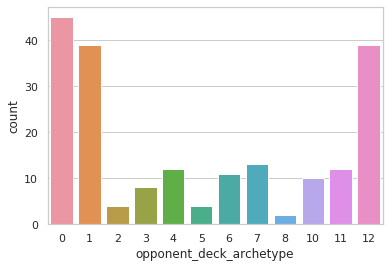

In [0]:
x = hsdat['opponent_deck_archetype']
sns.set(style="whitegrid")
hsdatst = sns.countplot(x)


## Druid's Meta

### Druid was my overall worse matchup seen in the general winrates above in this document. Using a countplot, we're able to see what is the most played Druid Archetype, and we can see how well my deck preforms against against them


### From the above countplot, we can see that Aggro is the most played Druid class in my tests. This most likely due to the many different high value low mana cards they have, for example:
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/6/60/BEEEES%21%21%21%2890708%29.png/200px-BEEEES%21%21%21%2890708%29.png?version=42673b41903449f5b5dc8fadd5a0a096)![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/f/f0/Soul_of_the_Forest%28311%29.png/200px-Soul_of_the_Forest%28311%29.png?version=cfab2b9c1f68139bf7ec6e1f316db1f6)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/c/c2/Blessing_of_the_Ancients%2890645%29.png/200px-Blessing_of_the_Ancients%2890645%29.png?version=ca16740e669a5101559882aca188c9e6)


---


These cards that are fairly dominant, Which  gives aggro druid such force

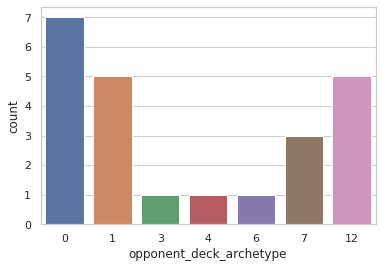

In [0]:
druidarc = druid.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = druidarc['opponent_deck_archetype']
sns.set(style="whitegrid")
druidst = sns.countplot(x)



### Something that's interesting here is that against the meta deck for Druid, we are able to see that my deck did well against it with a 85.7% winrate. This means that my struggles with Druid comes from the various other played Archetypes 

In [0]:
druidaggro= druidarc[druidarc.opponent_deck_archetype == 0]
druidaggro['W/L'].value_counts(normalize=True) * 100


1    85.714286
0    14.285714
Name: W/L, dtype: float64

### My worst matchups from my tests were 1 ( Control) and 12 (Quest) decks. Although for 3 ( Token\Lackey), 4 (Combo/OTK), and 6 (Tempo), I have not gone against them enough to gather conclusive data for winrates against them. however, I am able to state that due to their low playrates in the standard it's clear they're outliers of the meta. Which means while although my winrate against them can be can not be concluded, my chances of encountering them are slim, as individually I had encountered them 1 out of 199 matches. 

In [0]:
druidaggro= druidarc[druidarc.opponent_deck_archetype == 1]
druidaggro['W/L'].value_counts(normalize=True) * 100

1    60.0
0    40.0
Name: W/L, dtype: float64

##Hunter META - The Aggro Mainstay

### Hunter has always been an aggro mainstay in Hearthstone. It's fairly rare to see a deck for Hunter that isn't aggro. In a matter of fact the current iteration of quest hunter is a version of aggro that is slightly slower than the normal iteration to try and make up for their power fall off in the late game. 

![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/e/e0/Unleash_the_Hounds%28317%29.png/200px-Unleash_the_Hounds%28317%29.png?version=83f430729199f3e332965caf8d614bec)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/3/35/Scavenging_Hyena%28279%29.png/200px-Scavenging_Hyena%28279%29.png?version=28e7add2d74deb23eca06af498a11149)

---

1/1 minions are strong early game, however they fall of quite fast, however since hounds are beast you can potentionally anti-aggro with scavenging hyena  and unleash the hounds to deal some big damage. Because you can only have 7 minions on the board at one time at most your scavenging hyena can become a 14/8 as early as round 4 in specific circumstances

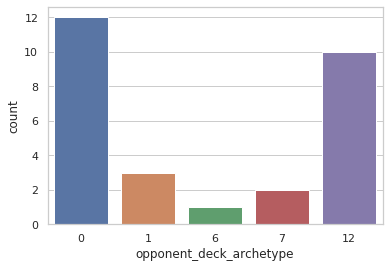

In [0]:
hunterarc = hunter.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = hunter['opponent_deck_archetype']
sns.set(style="whitegrid")
hunterst = sns.countplot(x)


In [0]:
hunteraggro= hunter[hunterarc.opponent_deck_archetype == 1]
hunteraggro['W/L'].value_counts(normalize=True) * 100

0    66.666667
1    33.333333
Name: W/L, dtype: float64

In [0]:
hunteraggro= hunter[hunterarc.opponent_deck_archetype == 12]
hunteraggro['W/L'].value_counts(normalize=True) * 100

1    70.0
0    30.0
Name: W/L, dtype: float64

## Mage META

As a long time Mage player,  I already had a feeling control qas going to be the leading archetype for the class. Many of the spells that go to mage support a very control heavy class that have strong board clears, removals, and stalls.

![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/7/76/Naga_Sand_Witch%2890820%29.png/200px-Naga_Sand_Witch%2890820%29.png?version=ca9cfb5b015516e583ffe5bbe2459791)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/4/40/Counterspell%28531%29.png/200px-Counterspell%28531%29.png?version=a579e2064009dd26473395742885c424)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/7/73/Pyroblast%28496%29.png/200px-Pyroblast%28496%29.png?version=4a5654832f05c622cc66156e081d5d2e)

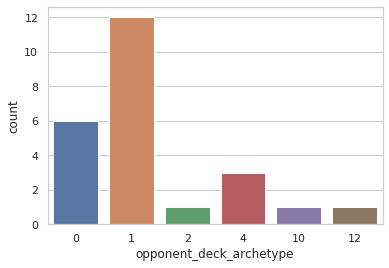

In [0]:
magearc = mage.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = mage['opponent_deck_archetype']
sns.set(style="whitegrid")
magest = sns.countplot(x)

### While my deck is control as well, it has the ability to get key hitting power due to Luna's Poket Galaxy, allowing me to top deck any minion I get.



In [0]:
magecontrol= mage[magearc.opponent_deck_archetype == 1]
magecontrol['W/L'].value_counts(normalize=True) * 100

1    58.333333
0    41.666667
Name: W/L, dtype: float64

## Paladin Meta

### Why is quest is dominant in Paladin

While in my tests it's clear so far that paladin has a lot of variability. However quest is slightly more important, because of emperor's wraps flexibility

---


![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/3/39/Making_Mummies%2890724%29.png/200px-Making_Mummies%2890724%29.png?version=3ab5db8b54fabdda5850efa29cbb204e)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/3/35/Emperor_Wraps%2890725%29.png/200px-Emperor_Wraps%2890725%29.png?version=e74c8171402c693f244a3194ed949f98)
![alt text](https://gamepedia.cursecdn.com/hearthstone_gamepedia/thumb/f/fc/Khartut_Defender%2890794%29.png/200px-Khartut_Defender%2890794%29.png?version=984fd715f826207e07772ffdf3491da3)

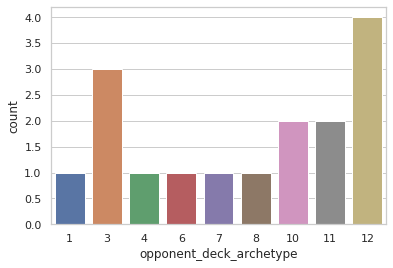

In [0]:
paladinarc = paladin.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = paladin['opponent_deck_archetype']
sns.set(style="whitegrid")
paladinst = sns.countplot(x)

## Priest Meta

Quest priest and Control priest are very similar, however quest is a bit more complex but once mastered is so much more interesting

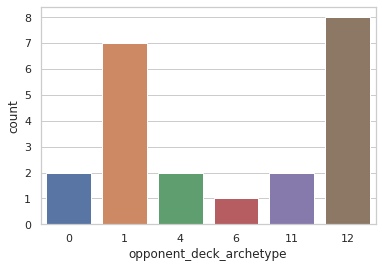

In [0]:
priestarc = priest.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = priest['opponent_deck_archetype']
sns.set(style="whitegrid")
priestst = sns.countplot(x)

## Rogue META

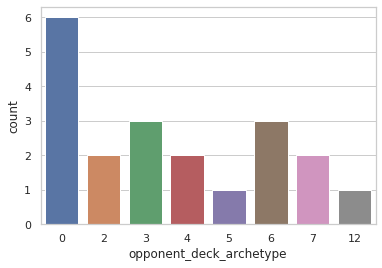

In [0]:
roguearc = rogue.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = rogue['opponent_deck_archetype']
sns.set(style="whitegrid")
roguest = sns.countplot(x)

## Shaman META

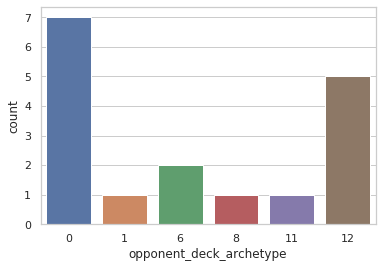

In [0]:
shamanarc = shaman.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = shaman['opponent_deck_archetype']
sns.set(style="whitegrid")
shamanst = sns.countplot(x)

## Warlock META

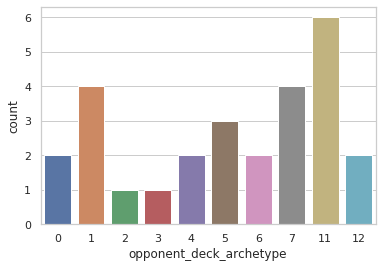

In [0]:
warlockarc = warlock.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = warlock['opponent_deck_archetype']
sns.set(style="whitegrid")
warlockst = sns.countplot(x)

## Warrior META

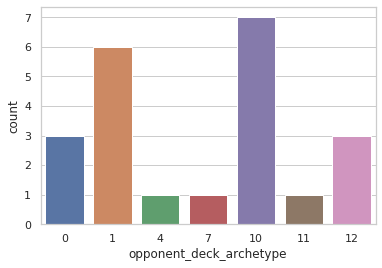

In [0]:
warriorarc = warrior.filter(['opponent_class','opponent_deck_archetype','W/L'], axis=1)
x = warrior['opponent_deck_archetype']
sns.set(style="whitegrid")
warriorst = sns.countplot(x)

# Turns and why we track them

Turns are a super important thing to keep track of. A lot of things happen at the start of a turn, for example, if your maximum mana is below 10, it goes up by 1 tick and refreshes (EX: **3** maximum mana last turn, this turn you have **4** maximum mana), You also draw a card from the top of your deck. 

This is also so important because it's impossible for a deck to be efficent in every turn, which is why certain archetypes like Aggro and Control exist. Aggro wants to win as a fast as possible, which means the deck is built to win **BEFORE you reach turn 10**, while control decks are made to **win PAST turn 10**. My deck is a **CONTROL DECK** made to win past turn 10.

## Below is my matches with a turn count of 10 or higher's winrate, with my ideal hand- 63.6%

In [0]:
good_hand_turns = good_hand[good_hand.Turns  >= 10]
good_hand_turns['W/L'].value_counts(normalize=True) * 100

1    63.636364
0    36.363636
Name: W/L, dtype: float64

## Below is my matches with a turn count of 9 or less' winrate, with my ideal hand - 50%

In [0]:
good1_hand_turns = good_hand[good_hand.Turns  <= 9]
good1_hand_turns['W/L'].value_counts(normalize=True) * 100

1    50.0
0    50.0
Name: W/L, dtype: float64

In [0]:
good_hand['W/L'].value_counts(normalize=True) * 100

1    58.823529
0    41.176471
Name: W/L, dtype: float64

## Below is my matches with a turn count of 10 or higher's winrate, with a **NON**-ideal hand - 54.8%

In [0]:
bad_hand_turns = bad_hand[bad_hand.Turns  >= 10]
bad_hand_turns['W/L'].value_counts(normalize=True) * 100

1    54.782609
0    45.217391
Name: W/L, dtype: float64

## Below is my matches with a turn count of 9 or less' winrate, with a **NON**-ideal hand - 52%

In [0]:
bad_hand_turns = bad_hand[bad_hand.Turns  <= 9]
bad_hand_turns['W/L'].value_counts(normalize=True) * 100

0    52.0
1    48.0
Name: W/L, dtype: float64

In [0]:
bad_hand['W/L'].value_counts(normalize=True) * 100

1    52.727273
0    47.272727
Name: W/L, dtype: float64

## Winrates based off Ideal hand and turns


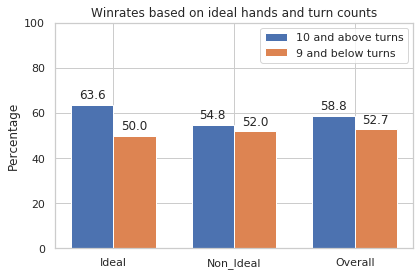

In [0]:
labels = ['Ideal', 'Non_Ideal', 'Overall']
good_means = [63.6, 54.8,58.8]
bad_means = [50, 52, 52.7]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, good_means, width, label='10 and above turns')
rects2 = ax.bar(x + width/2, bad_means, width, label='9 and below turns')


ax.set_ylabel('Percentage')
ax.set_title('Winrates based on ideal hands and turn counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0,100])


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# **Conclusion**

## My deck ended up being much more efficent overall, garnering a postive winrate in most situations, with no general weak point or strong point.